In [1]:
# Plot ad hoc mnist intances
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/ahmed/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ahmed/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ahmed/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ahmed/.local/lib/python3.7/site-packages/tensorflow/python/fra

In [2]:
# load the MNIST dataset
#train, test = mnist.load_data()

11493376/11490434 [==============================] - 25s 2us/step


In [4]:
len(train), len(test)

(2, 2)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

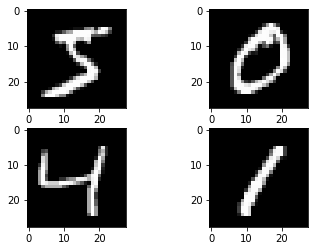

In [9]:
# plot 4 images as grey scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [11]:
# fix random seed for reprodcibility
seed = 7
np.random.seed(seed)

In [12]:
X_train.shape

(60000, 28, 28)

In [14]:
# flatten 28*28 to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [15]:
num_pixels

784

In [17]:
X_train.shape

(60000, 784)

In [19]:
X_test.shape

(10000, 784)

In [20]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [21]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [25]:
num_classes

10

In [28]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
# chech how many trainable parameters
var = baseline_model()
var.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [31]:
# build the model
model = baseline_model()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Baseline Error: %.2f%%' % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2801 - accuracy: 0.9200 - val_loss: 0.1374 - val_accuracy: 0.9571
Epoch 2/10
 - 5s - loss: 0.1106 - accuracy: 0.9678 - val_loss: 0.0998 - val_accuracy: 0.9692
Epoch 3/10
 - 6s - loss: 0.0719 - accuracy: 0.9792 - val_loss: 0.0765 - val_accuracy: 0.9765
Epoch 4/10
 - 6s - loss: 0.0496 - accuracy: 0.9859 - val_loss: 0.0670 - val_accuracy: 0.9788
Epoch 5/10
 - 5s - loss: 0.0356 - accuracy: 0.9901 - val_loss: 0.0643 - val_accuracy: 0.9791
Epoch 6/10
 - 6s - loss: 0.0266 - accuracy: 0.9927 - val_loss: 0.0640 - val_accuracy: 0.9802
Epoch 7/10
 - 5s - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.0697 - val_accuracy: 0.9798
Epoch 8/10
 - 5s - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0584 - val_accuracy: 0.9827
Epoch 9/10
 - 6s - loss: 0.0106 - accuracy: 0.9978 - val_loss: 0.0619 - val_accuracy: 0.9806
Epoch 10/10
 - 6s - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.0592 - val_accuracy: 0.9824
Baseline Error: 1.

### Simple Convnet for MNIST

In [2]:
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [14]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples] [channels] [width] [height]
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],  28, 28, 1).astype('float32')

In [15]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode otputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [16]:
def baseline_model_conv():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, (5,5), border_mode='valid', input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
# build the model
model = baseline_model_conv()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# final evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print('CNN Error: %.2f%%' % (100-scores[1]*100))

/home/ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.2406 - accuracy: 0.9312 - val_loss: 0.0734 - val_accuracy: 0.9776
Epoch 2/10
 - 13s - loss: 0.0735 - accuracy: 0.9781 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 3/10
 - 13s - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoch 4/10
 - 12s - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 5/10
 - 13s - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0326 - val_accuracy: 0.9884
Epoch 6/10
 - 13s - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0288 - val_accuracy: 0.9900
Epoch 7/10
 - 13s - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 8/10
 - 13s - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0310 - val_accuracy: 0.9894
Epoch 9/10
 - 14s - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0310 - val_accuracy: 0.9892
Epoch 10/10
 - 13s - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0359 - val_accuracy: 0.9884
CNN Error

In [ ]:
# Reshape data to (Samples, channels, width, height)
# for tensorflow, this should be  (samples, height, width, channels)
# for theano, this should be (samples, channels, height, width)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')
X_test.shape, X_train.shape

In [20]:
# Import modules to fix data format
from keras import backend as K
#K.set_image_dim_ordering('th')

# set image dimensions
img_cols,img_rows = X_train.shape[1], X_train.shape[2]
# If statement to fix data format
def dim_check():
    if K.image_data_format=='channels_first':

        x_train = x_train.reshape(x_train.shape[0], 1,img_cols,img_rows)
        x_test = x_test.reshape(x_test.shape[0], 1,img_cols,img_rows)
        input_shape = (1,img_cols,img_rows)
    else:
        x_train = x_train.reshape(x_train.shape[0],img_cols,img_rows,1)
        x_test = x_test.reshape(x_test.shape[0],img_cols,img_rows,1)
        input_shape = (img_cols,img_rows,1)
        return

In [22]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5,5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build model
model = larger_model()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Larger CNN Error: %.2f%%' % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.3695 - accuracy: 0.8903 - val_loss: 0.0818 - val_accuracy: 0.9741
Epoch 2/10
 - 12s - loss: 0.1006 - accuracy: 0.9688 - val_loss: 0.0513 - val_accuracy: 0.9836
Epoch 3/10
 - 11s - loss: 0.0703 - accuracy: 0.9781 - val_loss: 0.0426 - val_accuracy: 0.9861
Epoch 4/10
 - 11s - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 5/10
 - 14s - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0284 - val_accuracy: 0.9896
Epoch 6/10
 - 12s - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 7/10
 - 12s - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.0288 - val_accuracy: 0.9905
Epoch 8/10
 - 12s - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 9/10
 - 13s - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0273 - val_accuracy: 0.9905
Epoch 10/10
 - 12s - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0235 - val_accuracy: 0.9923
Larger CN

### Chapter 20: Improve model performance with image augmentation


#### Feature standardization

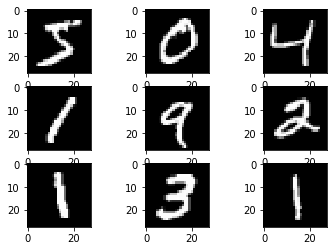

In [26]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3*3 images
for i in range(0, 9):
    plt.subplot(330 + 1+ i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [30]:
# Standardize images across the dataset, mean=0, std=1
from keras.preprocessing.image import ImageDataGenerator
# load data
# reshape to 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28 ,28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape, X_test.shape

((60000, 1, 28, 28), (10000, 1, 28, 28))

In [31]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)

/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


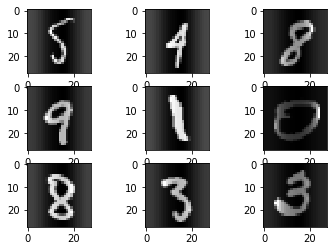

In [32]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3*3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

## ZCA whitening

In [33]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)

/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


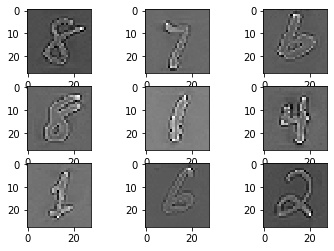

In [34]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3*3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

## Random rotaion

In [35]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)

/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


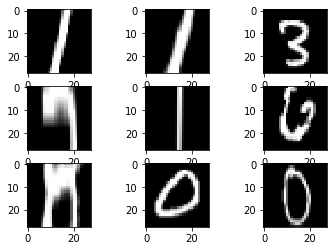

In [36]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3*3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

## Random shift

In [37]:
# specify shift value
shift = 0.2

In [38]:
# define data preparation
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)

/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


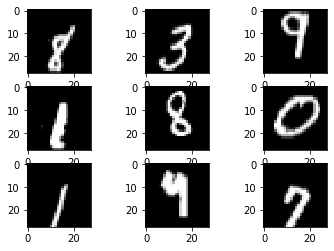

In [39]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3*3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

### Random flips

In [40]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)

/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/ahmed/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


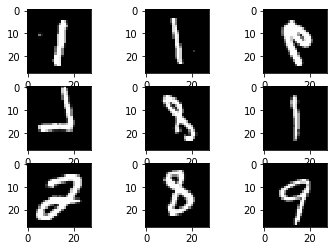

In [41]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3*3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

### saving Augmented images to file

In [42]:
import os

In [43]:
!pwd

/home/ahmed/Deep-learning-studying


In [47]:
# Standardize images across the dataset, mean=0, std=1
from keras.preprocessing.image import ImageDataGenerator
# load data
# reshape to 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28 ,28, 1)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [48]:
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)

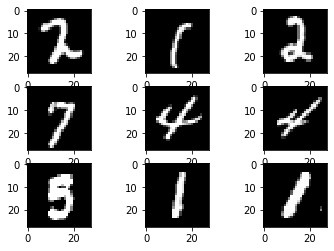

In [50]:
# configure batch size and retrieve one batch of images
#os.makedirs('Images-MNIST')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='Images-MNIST', save_prefix='aug', save_format='png'):
    for i in range(0,9):
        plt.subplot(330 + 1 +i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break